In [61]:
#plotting
import matplotlib.pyplot as plt
#shallowclassifier
from sklearn import datasets, svm, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

#math/data libs
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#ml libs
import keras
from keras import backend as K
from keras.models import Sequential
from keras. layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

In [69]:
###SWELL###
#trainFile = pd.read_csv('../input/swellwesad-hrv-data/HRV Dataset/combined-swell-classification-hrv-train-dataset.csv').drop(columns='NasaTLX class')
#testFile = pd.read_csv('../input/swellwesad-hrv-data/HRV Dataset/combined-swell-classification-hrv-test-dataset.csv').drop(columns='NasaTLX class')


###WESAD###
#trainFile = pd.read_csv('../input/swellwesad-hrv-data/HRV Dataset/wesad-classification-hrv-train-dataset.csv').drop(columns="SSSQ class")
#testFile = pd.read_csv('../input/swellwesad-hrv-data/HRV Dataset/wesad-classification-hrv-test-dataset.csv').drop(columns="SSSQ class")

##PPD##

trainFile = pd.read_csv('../input/ppd-v1/newtrain.csv').drop(columns="sr")
testFile = pd.read_csv('../input/ppd-v1/test.csv').drop(columns="sr")
valFile = pd.read_csv('../input/ppd-v1/val.csv').drop(columns="sr")

In [70]:
trainFile.astype('float64')
testFile.astype('float64')
valFile.astype('float64')

,age_range,res,edu,mar_sts,prev_job,prev_incm,now_job,now_incm,hus_edu,hus_incm,...,breastfeed,baby_ill,worry_baby,rest_monitor,rest_sleep,angry_aftr_baby,work_feel,PHQ2(bfr),PHQ2(drng),EPDS
0,1.0,1.0,3.0,0.0,5.0,1.0,0.0,0.0,3.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0
1,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0
3,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
4,1.0,1.0,4.0,0.0,2.0,1.0,0.0,0.0,4.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0
5,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0
6,1.0,1.0,4.0,0.0,5.0,2.0,0.0,0.0,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0
7,3.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
8,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0
9,3.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0


In [75]:
np.where(np.isnan(valFile))

(array([9]), array([25]))

In [74]:
np.nan_to_num(valFile)

array([[ 1.,  1.,  3.,  0.,  5.,  1.,  0.,  0.,  3.,  1.,  0.,  1.,  2.,
         1.,  0.,  3.,  1.,  1.,  0.,  0.,  1.,  8.,  1.,  0.,  0.,  0.,
         2.,  5.,  0.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,
         1.,  0.,  1.,  0.,  2.,  0.,  0.,  2.],
       [ 0.,  1.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,  4.,  0.,  1.,  0.,
         0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,
         1.,  5.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  3.,  0.,
         0.,  1.,  8.,  1.,  1.,  0.,  0.,  0.,  5.,  2.,  0.,  1.,  1.,
         3.,  4.,  0.,  0.,  0.,  2.,  0.,  3.,  0.,  1.,  0.,  0.,  1.,
         1.,  1.,  1.,  0.,  2.,  0.,  0.,  2.],
       [ 2.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  4.,  4.,  0.,  1.,  0.,
         0.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  5.,  3.,  5.,  1.,  1.,
         1.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [44]:
#from sklearn.model_selection import train_test_split
#trainFile, testFile = train_test_split(mainFile, test_size=0.2)

In [76]:
#features
#X_train = trainFile.drop(columns='condition')
#y_train = trainFile['condition']
#X_test = testFile.drop(columns='condition')
#y_test = testFile['condition']

X_train = trainFile.drop(columns='EPDS')
y_train = trainFile['EPDS']
X_test = testFile.drop(columns='EPDS')
y_test = testFile['EPDS']

In [4]:
#heatmap
#import seaborn as sns
#plt.figure(figsize=(12,10))
#corr = trainFile.corr()
#sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
#plt.show()

# **KNN** 

In [77]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.53


In [78]:
#y_pred = knn.predict(X_test)
#y_pred[:10]
#accuracy_score(y_test,y_pred)

y_score = knn.predict(X_test)
y_score[:30]
accuracy_score(y_test,y_score)

0.5333333333333333

In [79]:
print(classification_report(y_test,y_score))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        14
           1       0.33      0.33      0.33         3
           2       0.55      0.46      0.50        13

    accuracy                           0.53        30
   macro avg       0.48      0.48      0.48        30
weighted avg       0.53      0.53      0.53        30



[[9 1 4]
 [1 1 1]
 [6 1 6]]


<AxesSubplot:>

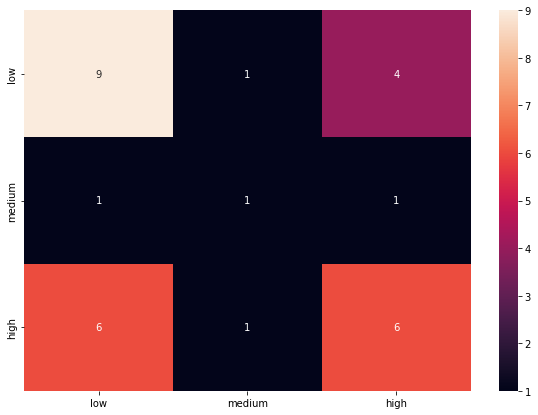

In [80]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sn
#import pandas as pd
#import matplotlib.pyplot as plt

#cm= confusion_matrix(y_test, y_score)
#print(cm)
#df_cm = pd.DataFrame(cm, index=["low", "medium", "high"], columns=["low", "medium", "high"])
#plt.figure(figsize = (10,7))
#sn.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SVM**

In [81]:
sv = svm.SVC()
sv.fit(X_train,y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(sv.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(sv.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.53
Accuracy of SVM classifier on test set: 0.57


In [82]:
y_pred = sv.predict(X_test)
y_pred[:10]
accuracy_score(y_test,y_pred)

0.5666666666666667

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.00      0.00      0.00         3
           2       0.50      0.69      0.58        13

    accuracy                           0.57        30
   macro avg       0.39      0.42      0.40        30
weighted avg       0.53      0.57      0.54        30



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest**

In [84]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print('Accuracy of RF classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.70


In [85]:
y_pred = rf.predict(X_test)
y_pred[:10]
accuracy_score(y_test,y_pred)

0.7

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.50      0.33      0.40         3
           2       0.67      0.77      0.71        13

    accuracy                           0.70        30
   macro avg       0.65      0.61      0.62        30
weighted avg       0.70      0.70      0.70        30



# **NN**

In [87]:
#train
train_samples = trainFile.drop(columns='EPDS').to_numpy()
train_labels = trainFile['EPDS'].to_numpy()

#test
test_samples = testFile.drop(columns='EPDS').to_numpy()
test_labels = testFile['EPDS'].to_numpy()

#val
val_samples = valFile.drop(columns='EPDS').to_numpy()
val_labels = valFile['EPDS'].to_numpy()

In [88]:
#normalizing features
scaler = MinMaxScaler(feature_range=(0,1))
train_samples = scaler.fit_transform(train_samples)
test_samples = scaler.fit_transform(test_samples)
val_samples = scaler.fit_transform(val_samples)

#one-hot-encoding labels
one_hot_encoder = OneHotEncoder(categories='auto')
train_labels = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1)).toarray()
test_labels = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1)).toarray()
val_labels = one_hot_encoder.fit_transform(val_labels.reshape(-1, 1)).toarray()

In [89]:
a,b= train_samples.shape
print(a)
print(b)

305
46


In [109]:
#build the model
model = Sequential([
    Dense(256, input_shape=[b,], activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               12032     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 51        
Total params: 54,275
Trainable params: 54,275
Non-trainable params: 0
_________________________________________________________________


In [126]:
checkpoint = keras.callbacks.ModelCheckpoint('/kaggle/working/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='max')

model.compile(Adam(learning_rate=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [127]:
#need gpu to run the code
his = model.fit(train_samples, train_labels, validation_data=(val_samples, val_labels), batch_size=64, epochs=100, shuffle=False, verbose=2, callbacks = [checkpoint])
#model.fit(train_samples, train_labels, validation_data=(val_samples, val_labels), batch_size=10, epochs=500, shuffle=False, verbose=2)

Epoch 1/100
5/5 - 1s - loss: 1.6357e-05 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to /kaggle/working/model-001-1.000000-0.666667.h5
Epoch 2/100
5/5 - 0s - loss: 1.1775e-05 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.6667

Epoch 00002: val_accuracy did not improve from 0.66667
Epoch 3/100
5/5 - 0s - loss: 9.4596e-06 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.6667

Epoch 00003: val_accuracy did not improve from 0.66667
Epoch 4/100
5/5 - 0s - loss: 7.5734e-06 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.6667

Epoch 00004: val_accuracy did not improve from 0.66667
Epoch 5/100
5/5 - 0s - loss: 6.4920e-06 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.6667

Epoch 00005: val_accuracy did not improve from 0.66667
Epoch 6/100
5/5 - 0s - loss: 5.5930e-06 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.6667

Epoch 00006: val_accuracy did not improve from 0.66667
Epoch 7/100

In [124]:
model.predict(test_samples)

array([[1.6833740e-01, 8.2112780e-07, 8.3166176e-01],
       [5.6438360e-10, 2.3078693e-03, 9.9769211e-01],
       [2.7175215e-10, 2.1788949e-08, 1.0000000e+00],
       [6.6320254e-03, 9.9136412e-01, 2.0038311e-03],
       [8.9348215e-01, 9.9688135e-02, 6.8297130e-03],
       [3.4308052e-09, 1.9184272e-09, 1.0000000e+00],
       [6.3345418e-12, 3.6840881e-09, 1.0000000e+00],
       [9.9997246e-01, 2.1525596e-08, 2.7541626e-05],
       [9.9112773e-01, 8.8690044e-03, 3.2224907e-06],
       [3.4367961e-10, 2.0256949e-09, 1.0000000e+00],
       [3.8406359e-08, 8.3505981e-08, 9.9999988e-01],
       [9.9217892e-01, 7.8040985e-03, 1.6908631e-05],
       [9.9975461e-01, 2.6718176e-06, 2.4273111e-04],
       [9.9999928e-01, 1.7710494e-08, 6.7740990e-07],
       [4.7470770e-08, 4.9213540e-08, 9.9999988e-01],
       [9.5977426e-02, 8.5251492e-01, 5.1507700e-02],
       [1.9112563e-01, 3.5039682e-04, 8.0852401e-01],
       [9.9999988e-01, 9.0623917e-09, 6.4660618e-08],
       [3.0333349e-06, 1.079

In [128]:
loss, acc = model.evaluate(test_samples, test_labels, verbose=1) 
print(acc*100)
print(loss)

1/1 [==============================] - 0s 17ms/step - loss: 3.3867 - accuracy: 0.5667
56.66666626930237
3.386723756790161


In [ ]:
model.save('ppd_nn_model.h5')